# autocorrelations, cholesky factorization

The autocorrelation matrix of a signal is a (toepliz) positive semi-definite hermitian matrix (Papoulis p383):

$
\begin{align}
\sum_{i,j} a_i \mathbf{R}(t_i, t_j) a_j 
&= \sum_{i,j} a_i \mathbb{E} \{ z(t_i) z(t_j)^\ast \}  a_j,  \\
&= \mathbb{E} \Big \{   \Big |  \sum_i a_i z(t_i)   \Big |^2  \Big \}, \\
&\geq 0.
\end{align}
$

The autocorrelation matrix admits a [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition#Matrix_inversion) which can performed with [scipy.linalg.cholesky_banded](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cholesky_banded.html#scipy-linalg-cholesky-banded):

$
\begin{align}
\mathbf{R}(t_i, t_j)
&= \mathbf{L} \mathbf{L}^\ast.
\end{align}
$

You can then generate a signal with the matching autocovariance from white noise $n$:

$
\begin{align}
\mathbf{\hat z} &= \mathbf{L} \mathbf{n}.
\end{align}
$




**References:**

- Papoulis (p383)
- Lilly 22017b
- Hoepffner et al. 2011



In [1]:
import numpy as np
from scipy.linalg import cholesky, toeplitz

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# cholesky?

In [3]:
A = np.array(
    [
        [
            1,
            -0.5,
        ],
        [
            -0.5,
            1,
        ],
    ]
)
A

array([[ 1. , -0.5],
       [-0.5,  1. ]])

In [4]:
np.linalg.det(A)

0.75

In [5]:
np.linalg.eigvals(A)

array([1.5, 0.5])

In [6]:
cholesky(A, lower=True)

array([[ 1.       ,  0.       ],
       [-0.5      ,  0.8660254]])

---

## for an autocorrelation

In [7]:
# toeplitz?

In [20]:
# analytical autocorrelation
T = 10
omega = 2 * np.pi * 0.5
R = lambda t: np.exp(-abs(t) / T) * np.cos(omega * t)

In [21]:
# target time line

dt = 1 / 24
t = np.arange(0, T * 10, dt)

Build the autocorrelation matrix

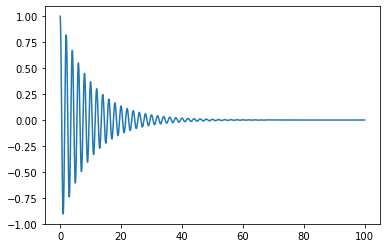

In [22]:
plt.plot(t, R(t))

In [23]:
A = toeplitz(R(t))

L = cholesky(A, lower=True)

In [24]:
L

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.87322435e-01,  1.58727466e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.57909891e-01,  2.61810451e-01,  1.17745189e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.24716573e-05, -1.23163614e-05, -5.80093881e-06, ...,
         9.66618709e-02,  0.00000000e+00,  0.00000000e+00],
       [ 4.42199330e-05, -7.48247701e-06, -3.57929853e-06, ...,
         1.06108318e-01,  9.66618709e-02,  0.00000000e+00],
       [ 4.51994664e-05, -2.56108331e-06, -1.31504498e-06, ...,
         1.13666543e-01,  1.06108318e-01,  9.66618709e-02]])

In [25]:
# generate white noise noise
noise = np.random.randn(t.size)

# generate time series
x = L @ noise

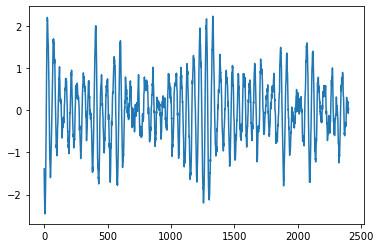

In [26]:
plt.plot(x)

In [27]:
R_hat = np.correlate(x, x, mode="full")

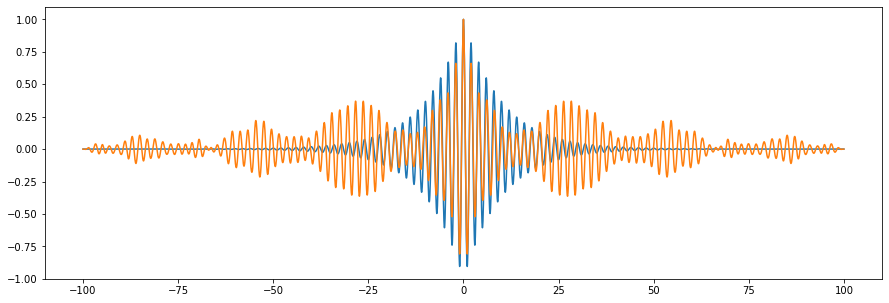

In [31]:
tb = np.hstack([-t[:0:-1], t])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(tb, R(tb))
ax.plot(tb, R_hat / max(R_hat))